This code is from David Shean's geospatial_cookbook_rendered notebook as part of UW's SnowEx hackweek 2021

In [1]:
import os
import rasterio as rio
import rasterio.plot
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
#Current url for 1/9th arcsec 3DEP raster products
#url1='https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/19/IMG/ned19_n48x25_w122x50_wa_puget_sound_2000.zip'
#fn1='ned19_n48x25_w122x50_wa_puget_sound_2000.img'
#Going to fetch and read zipfile on the fly, specifying img inside
#path=f'/vsizip//vsicurl/{url1}/{fn1}'
#os.path.splitext(os.path.split(url_list[0])[-1])[0]+'.img'

In [2]:
url_fn_3DEP = 'gm_3dep_1m_lidar_tiles.txt'

In [3]:
url_fn_3DEP

'gm_3dep_1m_lidar_tiles.txt'

In [4]:
with open(url_fn_3DEP) as f:
    url_list = f.read().splitlines()

In [5]:
url_list.sort()

In [25]:
# url_list_12 = []
# url_list_13 = []

# for url in url_list:
#     if 'UTM12' in url:
#         url_list_12.append(url)

# for url in url_list:
#     if 'UTM13' in url:
#         url_list_13.append(url)        

In [7]:
# url_list_12

NameError: name 'url_list_12' is not defined

In [26]:
# url_list_13

['https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1m/Projects/CO_MesaCo_QL2_UTM13_2015/TIFF/USGS_one_meter_x23y433_CO_MesaCo_QL2_UTM13_2015.tif',
 'https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1m/Projects/CO_MesaCo_QL2_UTM13_2015/TIFF/USGS_one_meter_x23y434_CO_MesaCo_QL2_UTM13_2015.tif',
 'https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1m/Projects/CO_MesaCo_QL2_UTM13_2015/TIFF/USGS_one_meter_x24y433_CO_MesaCo_QL2_UTM13_2015.tif',
 'https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1m/Projects/CO_MesaCo_QL2_UTM13_2015/TIFF/USGS_one_meter_x24y434_CO_MesaCo_QL2_UTM13_2015.tif',
 'https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1m/Projects/CO_MesaCo_QL2_UTM13_2015/TIFF/USGS_one_meter_x25y433_CO_MesaCo_QL2_UTM13_2015.tif',
 'https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1m/Projects/CO_MesaCo_QL2_UTM13_2015/TIFF/USGS_one_meter_x25y434_CO_MesaCo_QL2_UTM13_2015.tif',
 'https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1m/P

In [9]:
path_list = []
for url in url_list:
    #fn = os.path.splitext(os.path.split(url)[-1])[0]+'.img'
    #path = f'/vsizip//vsicurl/{url}/{fn}'
    path = f'/vsicurl/{url}'
    path_list.append(path)
path_list_str = ' '.join(path_list)

In [30]:
# path_list_12 = []
# for url in url_list_12:
#     #fn = os.path.splitext(os.path.split(url)[-1])[0]+'.img'
#     #path = f'/vsizip//vsicurl/{url}/{fn}'
#     path_12 = f'/vsicurl/{url}'
#     path_list_12.append(path_12)
# path_list_12_str = ' '.join(path_list_12)

In [34]:
# path_list_13 = []
# for url in url_list_13:
#     #fn = os.path.splitext(os.path.split(url)[-1])[0]+'.img'
#     #path = f'/vsizip//vsicurl/{url}/{fn}'
#     path_13 = f'/vsicurl/{url}'
#     path_list_13.append(path_13)
# path_list_13_str = ' '.join(path_list_13)

In [11]:
# path_13

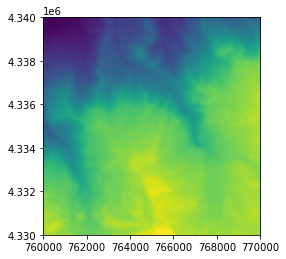

In [12]:
# with rio.open(path) as src:
#     rio.plot.show(src)

In [37]:
src.crs

CRS.from_epsg(26912)

In [10]:
url = 'https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1m/Projects/CO_MesaCo_QL2_UTM12_2016/TIFF/USGS_one_meter_x74y433_CO_MesaCo_QL2_UTM12_2016.tif'

In [13]:
path = f'/vsicurl/{url}'

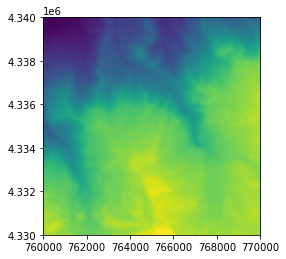

In [14]:
# with rio.open(path) as src:
#     rio.plot.show(src)

In [38]:
# url_12 = open("url_list_12.txt", "w")

# for element in url_list_12:

#     url_12.write(element + "\n")

# url_12.close()

In [15]:
url = open("url_list_12.txt", "w")

for element in url_list:

    url.write(element + "\n")

url.close()

In [17]:
url_fn_3DEP = 'url_list.txt'

In [40]:
vrt_fn_12 = os.path.splitext(url_fn_3DEP_12)[0]+'.vrt'
tif_fn_12 = os.path.splitext(url_fn_3DEP_12)[0]+'.tif'
hs_fn_12 = os.path.splitext(tif_fn_12)[0]+'_hs.tif'

In [18]:
vrt_fn = os.path.splitext(url_fn_3DEP)[0]+'.vrt'
tif_fn = os.path.splitext(url_fn_3DEP)[0]+'.tif'
hs_fn = os.path.splitext(tif_fn)[0]+'_hs.tif'

In [19]:
#This actually takes some time as file must be downloaded and unzipped to read img header
!gdalbuildvrt $vrt_fn $path_list_str

0...10...20.Warning 6: gdalbuildvrt does not support heterogeneous projection: expected NAD83 / UTM zone 13N, got NAD83 / UTM zone 12N. Skipping /vsicurl/https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1m/Projects/CO_MesaCo_QL2_UTM12_2016/TIFF/USGS_one_meter_x73y431_CO_MesaCo_QL2_UTM12_2016.tif
.Warning 6: gdalbuildvrt does not support heterogeneous projection: expected NAD83 / UTM zone 13N, got NAD83 / UTM zone 12N. Skipping /vsicurl/https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1m/Projects/CO_MesaCo_QL2_UTM12_2016/TIFF/USGS_one_meter_x73y432_CO_MesaCo_QL2_UTM12_2016.tif
.Warning 6: gdalbuildvrt does not support heterogeneous projection: expected NAD83 / UTM zone 13N, got NAD83 / UTM zone 12N. Skipping /vsicurl/https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1m/Projects/CO_MesaCo_QL2_UTM12_2016/TIFF/USGS_one_meter_x73y433_CO_MesaCo_QL2_UTM12_2016.tif
30Warning 6: gdalbuildvrt does not support heterogeneous projection: expected NAD83 / UTM zone 13N, got 

In [21]:
dst_crs = 'EPSG:32612'

In [22]:
#Since these tiles are mixed projection, can download, reproject and mosaic in one go
!gdalwarp -r cubic -tr 3.0 3.0 -dstnodata -9999 -t_srs $dst_crs \
-co COMPRESS=LZW -co TILED=YES -co BIGTIFF=IF_SAFER \
$path_list_str $tif_fn

Creating output file that is 19875P x 13981L.
Processing /vsicurl/https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1m/Projects/CO_MesaCo_QL1_2016/TIFF/USGS_one_meter_x25y434_CO_MesaCo_QL1_2016.tif [1/31] : 0Using internal nodata values (e.g. -999999) for image /vsicurl/https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1m/Projects/CO_MesaCo_QL1_2016/TIFF/USGS_one_meter_x25y434_CO_MesaCo_QL1_2016.tif.
...10...20...30...40...50...60...70...80...90...100 - done.
Processing /vsicurl/https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1m/Projects/CO_MesaCo_QL2_UTM12_2016/TIFF/USGS_one_meter_x23y432_CO_MesaCo_QL2_UTM12_2016.tif [2/31] : 0Using internal nodata values (e.g. -999999) for image /vsicurl/https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1m/Projects/CO_MesaCo_QL2_UTM12_2016/TIFF/USGS_one_meter_x23y432_CO_MesaCo_QL2_UTM12_2016.tif.
...10...20...30...40...50...60...70...80...90...100 - done.
Processing /vsicurl/https://prd-tnm.s3.amazonaws.com/StagedPro

In [43]:
src = rio.open(tif_fn_12)

In [1]:
tif_fn_12

NameError: name 'tif_fn_12' is not defined

In [44]:
src.profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 13337, 'height': 13540, 'count': 1, 'crs': CRS.from_epsg(32612), 'transform': Affine(3.0, 0.0, 729993.5474426108,
       0.0, -3.0, 4340613.205300439), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}

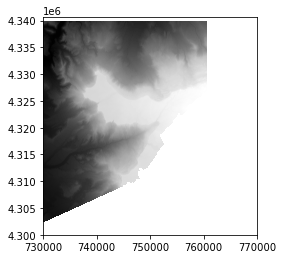

<AxesSubplot:>

In [45]:
rio.plot.show(src, cmap='gray')

In [23]:
poly_fn = '/home/jovyan/space_lasers/notebooks/grand_mesa_poly.geojson'

In [26]:
gm_poly = gpd.read_file(poly_fn)

<AxesSubplot:>

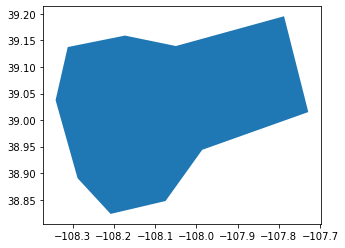

In [27]:
gm_poly.plot()

In [28]:
gm_poly.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [30]:
gm_poly = gm_poly.to_crs(crs='epsg:32612')

In [34]:
gm_poly.to_file("/home/jovyan/space_lasers/notebooks/GM_poly_32612.geojson", driver='GeoJSON')

In [6]:
gm_fn = "/home/jovyan/space_lasers/notebooks/GM_poly_32612.geojson"
tif_fn = '/home/jovyan/space_lasers/notebooks/gm_3dep_1m_lidar_tiles.tif'

In [7]:
import fiona
import rasterio
import rasterio.mask

with fiona.open(gm_fn, "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

In [8]:
type(shapes)

list

In [9]:
with rio.open(tif_fn) as src:
    out_image, out_transform = rio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta

In [10]:
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rasterio.open(tif_fn, "w", **out_meta) as dest:
    dest.write(out_image)

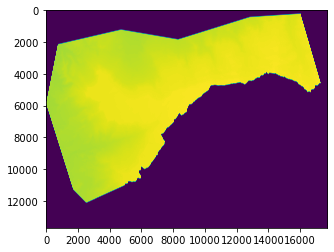

<AxesSubplot:>

In [11]:
rio.plot.show(out_image)

In [41]:
type(out_image)

numpy.ndarray

In [ ]:
lidar_ds=rxr.open_rasterio(url)
#resample the DTM to ~3m:
scale_factor = 1/3
new_width = int(lidar_ds.rio.width * scale_factor)
new_height = int(lidar_ds.rio.height * scale_factor)

#reproject the horizontal CRS to match ICESat-2
UTM_wgs84_crs=CRS.from_epsg(32612)
lidar_3m = lidar_ds.rio.reproject(
    UTM_wgs84_crs,
    shape=(new_height, new_width),
    resampling=Resampling.bilinear,
)